## Problem Statement

1) Analyse the data to understand what factors are important in graduate admissions and how these factors are interrelated among themselves.

2) Using linear regression predict one's chances of admission given the rest of the variables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Drop the unique row Identifier
df.drop(columns=['Serial No.'],inplace=True)

## Analysing the basic metrics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
df.describe(include=[np.number])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isnull().sum()/len(df)*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

No null value present in the dataset

In [8]:
df.shape

(500, 8)

There are 7 independent feature and 1 depedent features

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(500, 8)

No duplicated were found

## Non-Graphical Analysis

In [11]:
df.columns.value_counts()

GRE Score            1
TOEFL Score          1
University Rating    1
SOP                  1
LOR                  1
CGPA                 1
Research             1
Chance of Admit      1
dtype: int64

In [12]:
df.columns.value_counts(normalize=True)*100

GRE Score            12.5
TOEFL Score          12.5
University Rating    12.5
SOP                  12.5
LOR                  12.5
CGPA                 12.5
Research             12.5
Chance of Admit      12.5
dtype: float64

In [13]:
df.nunique()  


GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [14]:
df['University Rating'].unique()  

array([4, 3, 2, 5, 1], dtype=int64)

In [15]:
df['SOP'].unique()  

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [16]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [17]:
df['Research'].unique()

array([1, 0], dtype=int64)

# Visual Analysis

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research', ylabel='count'>

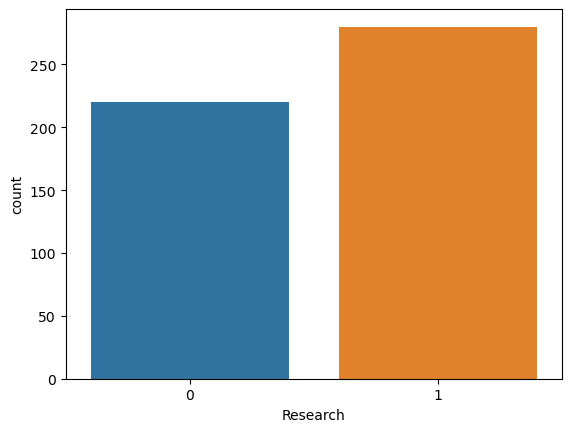

In [18]:
sns.countplot(df['Research'])

Student with research papers are more.

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP', ylabel='count'>

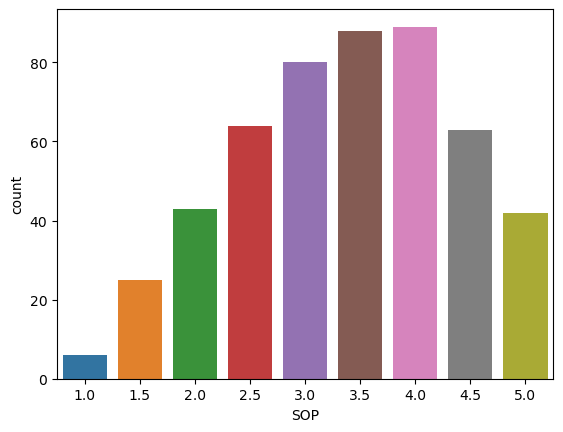

In [19]:
sns.countplot(df['SOP'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR ', ylabel='count'>

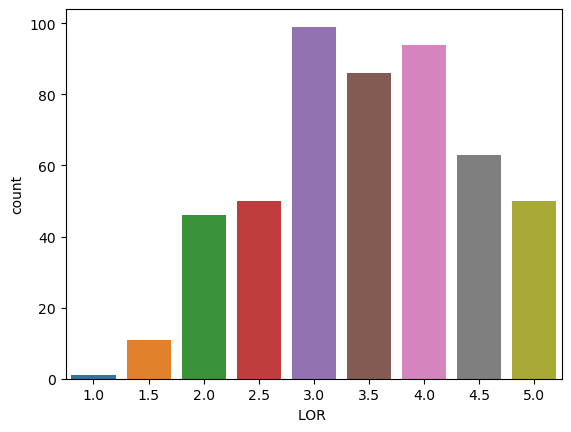

In [20]:
sns.countplot(df['LOR '])

Maximum LOR and SOP rating are between 3 to 4

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

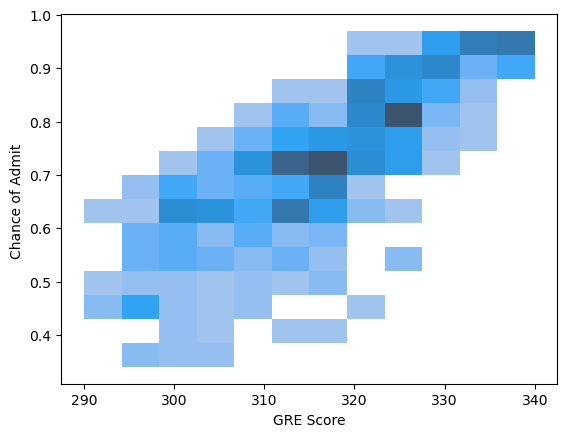

In [22]:
sns.histplot(df,x='GRE Score',y='Chance of Admit ')

There is correlation between GRE score and Chance of Admit

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Box Plot AxesSubplot(0.125,0.11;0.775x0.77)
Box Plot AxesSubplot(0.125,0.11;0.775x0.77)
Box Plot AxesSubplot(0.125,0.11;0.775x0.77)


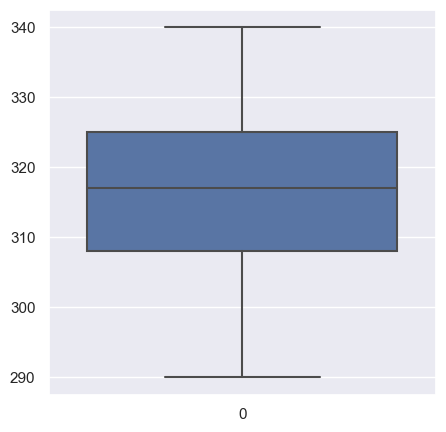

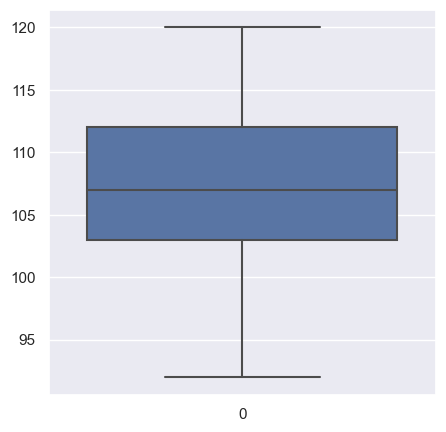

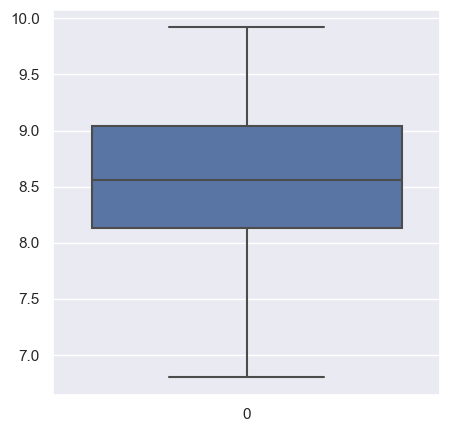

<Figure size 500x500 with 0 Axes>

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
for i in ['GRE Score', 'TOEFL Score','CGPA']:
 a=sns.boxplot(data=df[i])
 plt.figure(i)
 print("Box Plot",a)

No outliers detected

In [25]:
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
    Q2 = np.percentile(df[i], 50, interpolation = 'midpoint')
    Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    df=df[(df[i]>low_lim) & (df[i]<up_lim)]


C:\Users\gokul\AppData\Local\Temp\ipykernel_53748\2608968996.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
C:\Users\gokul\AppData\Local\Temp\ipykernel_53748\2608968996.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df[i], 50, interpolation = 'midpoint')
C:\Users\gokul\AppData\Local\Temp\ipykernel_53748\2608968996.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint

## Bivariate Analysis

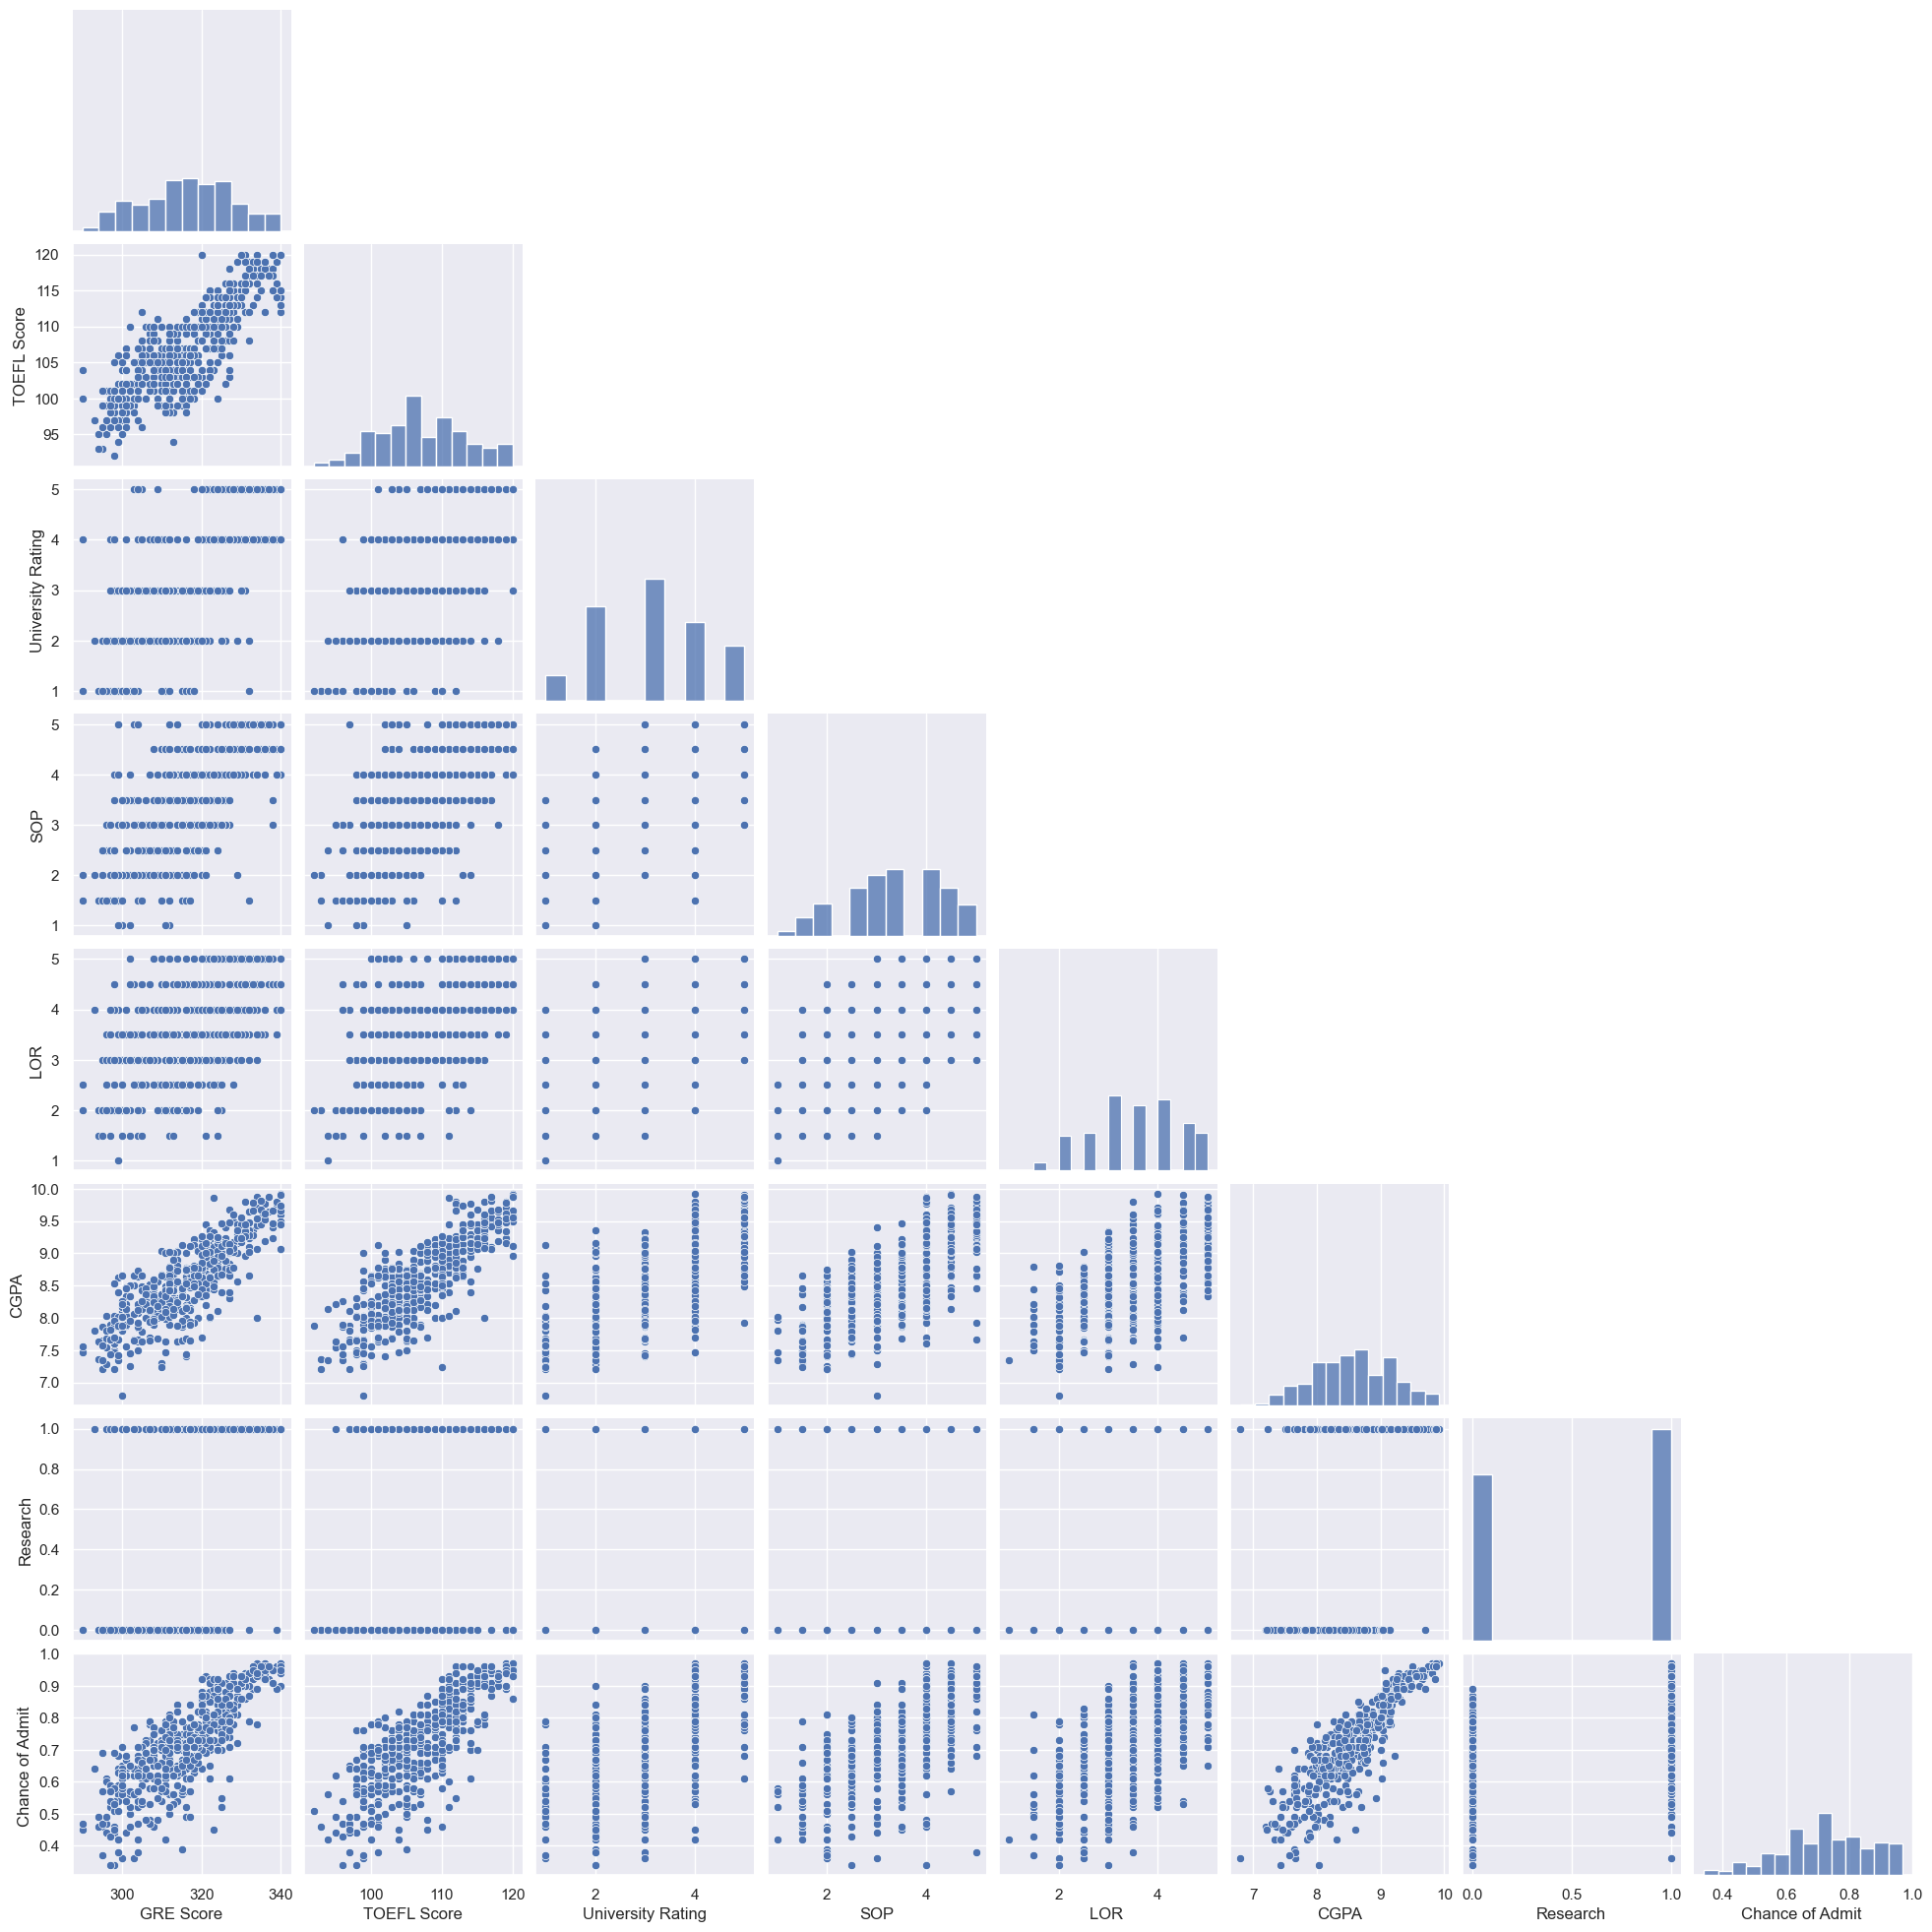

In [26]:
sns.pairplot(df,corner=True)

There is a linear correlation between Chance of admit and GRE score, TOEFLE score and CGPA
There can be a multi collinerity between GRE Score, TOEFLE score and CPGA

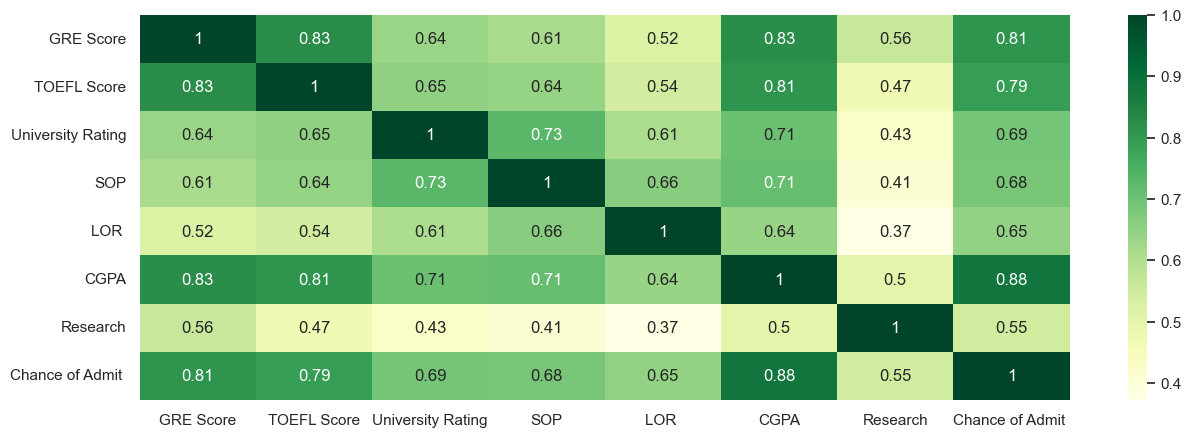

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True ,cmap="YlGn" )
plt.show()

In [28]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Data preparation for modeling

In [29]:
X = df[df.columns.drop('Chance of Admit ')]
y = df["Chance of Admit "] 

In [30]:
from statsmodels.tools.tools import add_constant
X= add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model building

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_hat1 = model.predict(X_test)

In [35]:
r2_train=model.score(X_train,y_train)

In [36]:
r2_test=model.score(X_test,y_test)

In [37]:
adj_r2_train=1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [38]:
adj_r2_test=1-(1-r2_test)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [39]:
mae=mean_absolute_error(y_hat1,y_test)

In [40]:
mse=mean_squared_error(y_hat1,y_test)

In [41]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.8233008684330227
R2 score for testing data  0.8126005133372548
Adjusted R2 score for training data  0.8196855409329311
Adjusted R2 score for test data  0.8087662527405746
Mean Absolute Error  0.04545274666153921
Mean Squard Error 0.004360178880305292


R2 score for training and test data is almost same for there is no varience. Training performance is not upto the mark so more sophiticated model can be used.

In [42]:
w0 = model.intercept_
coff = pd.DataFrame()
coff['Features'] = X.columns
coff['cofficient'] = model.coef_
print('intercept:', w0)
print()
print(coff)

intercept: 0.722625

            Features  cofficient
0              const    0.000000
1          GRE Score    0.018257
2        TOEFL Score    0.021115
3  University Rating    0.006145
4                SOP    0.002909
5               LOR     0.017943
6               CGPA    0.066286
7           Research    0.010514


Most important feature is CGPA, followed by TOEFL and GRE score

## Trying out other regression

### Polynomial Regression

In [43]:
# not able to achieve desired R2 score
# going of polynomical regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_test1 = poly.fit_transform(X_test)
X_train1 = poly.fit_transform(X_train)

In [45]:
from sklearn.linear_model import Lasso
model1 = LinearRegression()

In [46]:
model1.fit(X_train1,y_train)

LinearRegression()

In [47]:
y_hat = model1.predict(X_test1)

In [48]:
r2_train=model1.score(X_train1,y_train)

In [49]:
r2_test=model1.score(X_test1,y_test)

In [50]:
adj_r2_train=1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [51]:
adj_r2_test=1-(1-r2_test)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [52]:
mae=mean_absolute_error(y_hat,y_test)

In [53]:
mse=mean_squared_error(y_hat,y_test)

In [54]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.8369236060284035
R2 score for testing data  0.8213036108789953
Adjusted R2 score for training data  0.83358700461722
Adjusted R2 score for test data  0.8176474187742178
Mean Absolute Error  0.04377284851074219
Mean Squard Error 0.004157685998545027


R2 score for training and test data is almost same for there is no varience. Training performance is not upto the mark so more sophiticated model can be used.

In [55]:
w0 = model1.intercept_
w1 = model1.coef_
print(w0, w1)

35742422987.730515 [ 1.08696016e+07 -1.11104820e+10  1.40080452e-02  2.38280296e-02
  5.81288338e-03  3.68142128e-03  1.97432041e-02  6.42857552e-02
 -6.82398863e+09 -3.95499000e+08  4.47940842e+08 -6.20232794e+08
  8.63773929e+07 -6.78794289e+08  2.93222886e+07  3.61878007e+07
 -4.89161824e+07  3.01456451e-03 -6.27326965e-03  1.01070404e-02
 -7.91859627e-03  1.46027803e-02 -1.24011040e-02 -4.01878357e-03
 -9.93967056e-04  1.62720680e-03  1.47579610e-02 -1.02597475e-02
 -4.01020050e-03  1.01704597e-02  9.08493996e-04  2.32797861e-02
 -9.56350565e-03 -1.29946470e-02 -1.70838833e-03 -1.47130489e-02
  1.05313063e-02 -5.12963533e-03 -8.15331936e-04  3.34501266e-04
 -1.17121339e-02 -7.47799873e-04  1.23548508e-02  7.18164444e-03
 -3.57532926e+10]


Polynomial regression has reduced both bias and varience

### Ridge regression

In [56]:
from sklearn.linear_model import Ridge

In [57]:
model2 = Ridge()

In [58]:
model2.fit(X_train,y_train)

Ridge()

In [59]:
y_hat = model2.predict(X_test)

In [60]:
r2_train=model2.score(X_train,y_train)

In [61]:
adj_r2_train=1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [62]:
r2_test=model2.score(X_test,y_test)

In [63]:
adj_r2_test=1-(1-r2_test)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [64]:
mae=mean_absolute_error(y_hat,y_test)

In [65]:
mse=mean_squared_error(y_hat,y_test)

In [66]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.8232967601316379
R2 score for testing data  0.8123226398525958
Adjusted R2 score for training data  0.8196813485742289
Adjusted R2 score for test data  0.8084826938649251
Mean Absolute Error  0.04552468460093109
Mean Squard Error 0.004366644095983219


R2 score for training and test data is almost same for there is no varience. Training performance is not upto the mark so more sophiticated model can be used.

In [67]:
w0 = model.intercept_
coff = pd.DataFrame()
coff['Features'] = X.columns
coff['cofficient'] = model.coef_
print('intercept:', w0)
print()
print(coff)

intercept: 0.722625

            Features  cofficient
0              const    0.000000
1          GRE Score    0.018257
2        TOEFL Score    0.021115
3  University Rating    0.006145
4                SOP    0.002909
5               LOR     0.017943
6               CGPA    0.066286
7           Research    0.010514


Most important feature is CGPA, followed by TOEFL and GRE score

### Lasso Regression

In [68]:
from sklearn.linear_model import Lasso

In [69]:
model3 = Lasso(alpha=0.01)

In [70]:
model3.fit(X_train,y_train)

Lasso(alpha=0.01)

In [71]:
y_hat = model3.predict(X_test)

In [72]:
r2_train=model3.score(X_train,y_train)

In [73]:
adj_r2_train=1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [74]:
r2_test=model3.score(X_test,y_test)

In [75]:
adj_r2_test=1-(1-r2_test)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [76]:
mae=mean_absolute_error(y_hat,y_test)

In [77]:
mse=mean_squared_error(y_hat,y_test)

In [78]:
print("R2 score for training data ",r2_train)
print("R2 score for testing data ",r2_test)
print("Adjusted R2 score for training data ",adj_r2_train)
print("Adjusted R2 score for test data ",adj_r2_test )
print('Mean Absolute Error ',mae )
print('Mean Squard Error', mse)

R2 score for training data  0.8147691839116185
R2 score for testing data  0.7994795361743091
Adjusted R2 score for training data  0.8109792950913958
Adjusted R2 score for test data  0.7953768156868269
Mean Absolute Error  0.04675812167329311
Mean Squard Error 0.0046654615069210295


R2 score for training and test data is almost same for there is no varience. Training performance is not upto the mark so more sophiticated model can be used.

In [79]:
w0 = model.intercept_
coff = pd.DataFrame()
coff['Features'] = X.columns
coff['cofficient'] = model.coef_
print('intercept:', w0)
print()
print(coff)

intercept: 0.722625

            Features  cofficient
0              const    0.000000
1          GRE Score    0.018257
2        TOEFL Score    0.021115
3  University Rating    0.006145
4                SOP    0.002909
5               LOR     0.017943
6               CGPA    0.066286
7           Research    0.010514


Most important feature is CGPA, followed by TOEFL and GRE score

## Check for assumptions

### Check for Multicollinearity by VIF score

In [80]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1511.50
6,CGPA,4.78
1,GRE Score,4.46
2,TOEFL Score,3.90
4,SOP,2.84
3,University Rating,2.62
5,LOR,2.03
7,Research,1.49


##### Vif if not more than 5
##### Vif is less than 5, so there is low multiCollinearity

### Normality of residuals

Text(0.5, 1.0, 'Histogram of residuals')

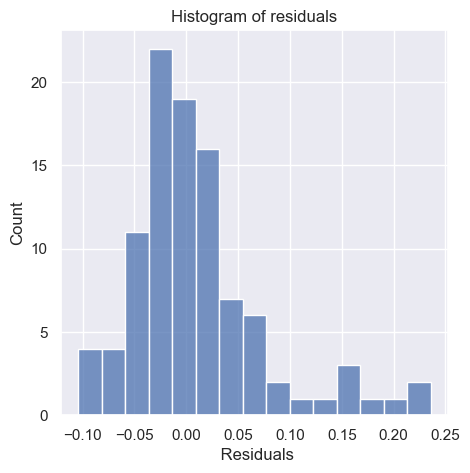

In [81]:
# Errors are normally distributed
errors = y_hat1 - y_test
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

##### Residuals are skewd towards negative side

### Check for Heteroskedasticity and Linearity of variable

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs Residuals')

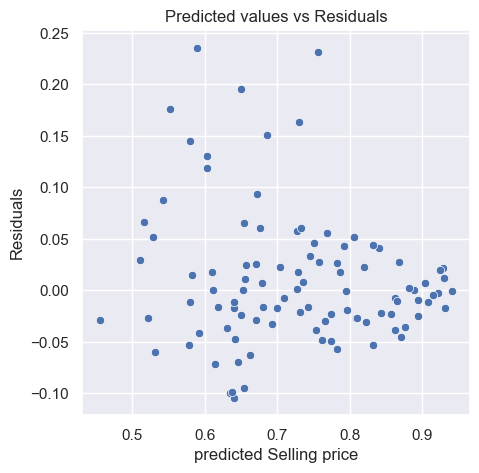

In [82]:
# Heteroskedasticity
sns.scatterplot(y_hat,errors)
plt.xlabel("Chance of admit")
plt.ylabel("Residuals")
plt.title("Chance of admit vs Residuals")

##### Heteroskedasticity should not exist

##### Residuals are skewd towards negative side

###### No pattern in the residual plot implying Linearity of variables 

### Mean of residuals

In [83]:
np.mean(errors)

0.010141315189911041

The mean is also near to zero

## Actionable Insights

1) Polynomial regression is the best model compared to linear regression, Lasso and Ridge

2) CGPA has the highest importance for the prediction followed by TOFLE score and GRE score

3) SOP is the least important factor

4) There is a linear correlation between the Chance of admission and GRE score, TOEFL score and CGPA There can be a multi-collinearity between GRE Score, TOEFL score and CPGA

5) Maximum LOR and SOP ratings are between 3 to 4

6) The residuals are skewed towards the negative side and so log transformation of output might be required.

7) Heteroskedasticity should not exist 

8) No pattern in the residual plot implying Linearity of variables

9) Vif is less than 5, so there is low multiCollinearity

## Recommendations

1) Use Polynomial Regression for better prediction as other models has a higher bias

2) Student with better CGPA is likely to get TOFLE and GRE score and consequently get admission

3) Other information such as age, family income, etc may help in better prediction

4) Can use deep learning model or increase the order of the polynomial function to decrease the bias

6) More data wouldn't have an effect as the variance is really low.